In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torch.optim import SGD

import numpy as np
from numpy import dot
import matplotlib.pyplot as plt

In [3]:
INPUT_SIZE = 784
HIDDEN_SIZE = 2048
NUM_CLASSES = 10
NUM_EPOCHS = 50
BATCH_SIZE = 50
LEARNING_RATE = 0.1

NUM_TRAIN = 1000
NUM_TEST = 1000

In [5]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transforms.ToTensor())

reduced_train_index=list(range(NUM_TRAIN))
reduced_test_index=list(range(NUM_TEST))

subset_train_dataset=Subset(train_dataset, reduced_train_index)
subset_test_dataset=Subset(test_dataset, reduced_test_index)

# Data loader
train_loader = DataLoader(dataset=subset_train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(dataset=subset_test_dataset, batch_size=1, shuffle=False) 

8.9%

100.0%


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw


100.0%
2.0%


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw



100.0%
100.0%


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



NameError: name 'batch_size' is not defined

In [ ]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        x = self.input_layer(x)
        x = x.relu()
        x = self.output_layer(x)
        return x
    
def ReLU_glorot_init(model):
    for name, param in model.named_parameters():
        
        if name.endswith(".bias"):
            param.data.fill_(0)
        else:
            nn.init.xavier_normal_(param)

In [ ]:
model = NeuralNet(INPUT_SIZE, HIDDEN_SIZE, NUM_CLASSES)
ReLU_glorot_init(model)

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LEARNING_RATE)

def train_epoch():
    for images, labels in train_loader:
        images = images.reshape(-1, INPUT_SIZE)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss.item()

for epoch in range(NUM_EPOCHS):
    l=train_epoch()
    print('Epoch {}: Loss {:.3f}'.format(epoch+1,l))

Epoch 1: Loss 1.035
Epoch 2: Loss 0.687
Epoch 3: Loss 0.671
Epoch 4: Loss 0.373
Epoch 5: Loss 0.255
Epoch 6: Loss 0.369
Epoch 7: Loss 0.381
Epoch 8: Loss 0.303
Epoch 9: Loss 0.306
Epoch 10: Loss 0.354
Epoch 11: Loss 0.220
Epoch 12: Loss 0.199
Epoch 13: Loss 0.109
Epoch 14: Loss 0.200
Epoch 15: Loss 0.144
Epoch 16: Loss 0.113
Epoch 17: Loss 0.141
Epoch 18: Loss 0.116
Epoch 19: Loss 0.109
Epoch 20: Loss 0.108
Epoch 21: Loss 0.151
Epoch 22: Loss 0.054
Epoch 23: Loss 0.069
Epoch 24: Loss 0.085
Epoch 25: Loss 0.062
Epoch 26: Loss 0.081
Epoch 27: Loss 0.060
Epoch 28: Loss 0.044
Epoch 29: Loss 0.054
Epoch 30: Loss 0.050
Epoch 31: Loss 0.035
Epoch 32: Loss 0.035
Epoch 33: Loss 0.034
Epoch 34: Loss 0.046
Epoch 35: Loss 0.028
Epoch 36: Loss 0.034
Epoch 37: Loss 0.059
Epoch 38: Loss 0.029
Epoch 39: Loss 0.028
Epoch 40: Loss 0.032
Epoch 41: Loss 0.037
Epoch 42: Loss 0.025
Epoch 43: Loss 0.027
Epoch 44: Loss 0.038
Epoch 45: Loss 0.031
Epoch 46: Loss 0.019
Epoch 47: Loss 0.013
Epoch 48: Loss 0.026
E

In [ ]:
def test():
    correct_list=[]
    with torch.no_grad():
        correct = 0
        total = 0
        for k,(images, labels) in enumerate(test_loader):
            images = images.reshape(-1, INPUT_SIZE)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            if predicted==labels:
                correct_list.append(1)
            else:
                correct_list.append(0)
        return correct_list, sum(correct_list)/len(correct_list)

0.865


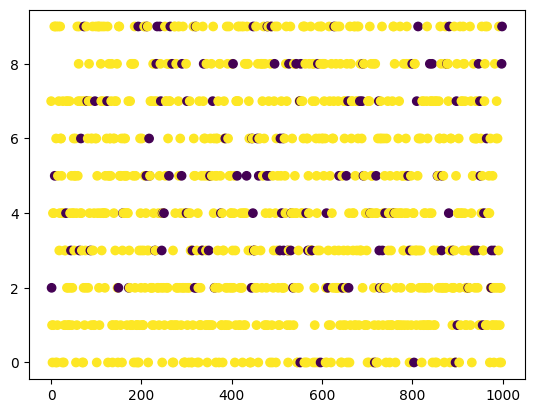

In [ ]:
c_list, acc=test()
print(acc)
color_list=[]
plt.scatter(np.arange(NUM_TEST),[sample[1] for sample in subset_test_dataset],c=c_list)